In [1]:
!pip install accelerate==0.21.0
!pip install peft==0.4.0
!pip install bitsandbytes==0.40.2
!pip install transformers==4.31.0
!pip install trl==0.4.7
!pip install scipy
!pip install tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 9.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 182.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.4/481.4 kB 127.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 158.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 205.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 38.1 MB/s

In [2]:
!pip install pandas numpy scikit-learn tensorflow optuna matplotlib seaborn imbalanced-learn evaluate -q --root-user-action=ignore


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
!nvidia-smi

Tue Apr 15 06:05:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.127.05             Driver Version: 550.127.05     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          On  |   00000000:0A:00.0 Off |                    0 |
| N/A   24C    P0             61W /  400W |       1MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [4]:
!pip install "numpy<2.0" --root-user-action=ignore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 170.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [5]:
import pandas as pd

file_path = "/workspace/synthetic_mobile_money_transaction_dataset (2).csv"
df = pd.read_csv(file_path)

df_small = df.sample(frac=0.1, random_state=42)
df_small.head()

,step,transactionType,amount,initiator,oldBalInitiator,newBalInitiator,recipient,oldBalRecipient,newBalRecipient,isFraud
2756866,128,PAYMENT,549.26,4775174972323651,9.331100e+02,3.838500e+02,53-0004950,174840.48,175389.75,0
3706231,170,TRANSFER,66.84,4710827309084142,6.684000e+01,0.000000e+00,4153806432656301,5678727.64,5678794.48,1
2157533,101,PAYMENT,618.35,4770527475674695,1.283088e+08,1.283082e+08,50-0003340,257628.03,258246.38,0
1456725,68,TRANSFER,41.36,4047879845066574,4.136000e+01,0.000000e+00,4926023542478628,937413.99,937455.34,1
4204294,192,TRANSFER,30.71,4073834911026298,3.071000e+01,0.000000e+00,4947482050804234,4754627.08,4754657.79,1


In [6]:
# Check the size of the new sampled dataset
print(f"Sampled dataset size: {len(df_small)}")

Sampled dataset size: 422596


In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and labels (y)
X_small = df_small.drop('isFraud', axis=1)  # Features
y_small = df_small['isFraud']  # Target label

# Split into training, validation, and test sets (80%, 10%, 10%)
X_train, X_temp, y_train, y_temp = train_test_split(X_small, y_small, test_size=0.2, stratify=y_small, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Check the sizes of the splits
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 338076
Validation set size: 42260
Test set size: 42260


In [8]:
def convert_to_sentence(row):
    # Access 'isFraud' from the original DataFrame 'df' using the row index
    isFraud_value = df.loc[row.name, 'isFraud']


    if row['transactionType'] == 'transfer':
        sentence = (f"Transaction Details (Step {row['step']}):\n"
                    f"- Transaction Type: '{row['transactionType']}'\n"
                    f"- Transaction Amount: ${row['amount']:.2f}\n"
                    f"- Initiator's Balance: From ${row['oldBalInitiator']:.2f} to ${row['newBalInitiator']:.2f}\n"
                    f"- Recipient's Balance: From ${row['oldBalRecipient']:.2f} to ${row['newBalRecipient']:.2f}\n"
                    f"- Please determine if this transfer is suspicious based on the balances and amount.")
    else:
        sentence = (f"Transaction Details (Step {row['step']}):\n"
                    f"- Transaction Type: '{row['transactionType']}'\n"
                    f"- Transaction Amount: ${row['amount']:.2f}\n"
                    f"- Initiator's Balance: From ${row['oldBalInitiator']:.2f} to ${row['newBalInitiator']:.2f}\n"
                    f"- Recipient's Balance: From ${row['oldBalRecipient']:.2f} to ${row['newBalRecipient']:.2f}\n"
                    f"- Based on this transaction, assess if it shows irregularities.")
    return sentence


In [9]:
# Apply the textualization function to the training, validation, and test sets
train_texts = X_train.apply(convert_to_sentence, axis=1)
val_texts = X_val.apply(convert_to_sentence, axis=1)
test_texts = X_test.apply(convert_to_sentence, axis=1)

In [11]:
!pip install bitsandbytes --root-user-action=ignore


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [17]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# This will download the tokenizer and model files and cache them locally
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
model = AutoModelForCausalLM.from_pretrained("distilgpt2")



config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

2025-04-15 06:27:06.325776: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 06:27:06.328978: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 06:27:06.337239: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744698426.351357     203 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744698426.355800     203 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744698426.368184     203 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [36]:
from transformers import GPT2Tokenizer

# Initialize the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("distilbert/distilgpt2")

# Set pad_token to eos_token
tokenizer.pad_token = tokenizer.eos_token
tokenizer.pad_token_id = tokenizer.eos_token_id

# Tokenize the datasets
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True)

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

In [37]:

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        # Extract the input_ids and attention_mask for this index
        item = {
            "input_ids": torch.tensor(self.encodings["input_ids"][idx], dtype=torch.long),
            "attention_mask": torch.tensor(self.encodings["attention_mask"][idx], dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.float)  # 👈 Set dtype to float for BCEWithLogitsLoss
        }
        return item

    def __len__(self):
        return len(self.labels)

# Convert to dataset
train_dataset = CustomDataset(train_encodings, y_train.values)
val_dataset = CustomDataset(val_encodings, y_val.values)
test_dataset = CustomDataset(test_encodings, y_test.values)


In [38]:

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        # Extract the input_ids and attention_mask for this index
        item = {
            "input_ids": torch.tensor(self.encodings["input_ids"][idx], dtype=torch.long),
            "attention_mask": torch.tensor(self.encodings["attention_mask"][idx], dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.float)  # 👈 Set dtype to float for BCEWithLogitsLoss
        }
        return item

    def __len__(self):
        return len(self.labels)

# Convert to dataset
train_dataset = CustomDataset(train_encodings, y_train.values)
val_dataset = CustomDataset(val_encodings, y_val.values)
test_dataset = CustomDataset(test_encodings, y_test.values)


In [39]:
from peft import get_peft_model, LoraConfig

# Configure LoRA
lora_config = LoraConfig(
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    target_modules=["c_attn"],  # Valid for GPT-2-like models
    bias="none",
    task_type="SEQ_CLS"
)

# Load pre-trained DistilGPT-2 and apply LoRA
from transformers import GPT2ForSequenceClassification

model = GPT2ForSequenceClassification.from_pretrained("distilgpt2")

# Set the padding token for the model (this must match the tokenizer's padding token)
model.config.pad_token_id = model.config.eos_token_id

model = get_peft_model(model, lora_config)


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
from transformers import TrainerCallback
import numpy as np

# 1. Define compute_metrics for accuracy & AUC
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    
    acc = accuracy_score(labels, preds)

    # For binary classification and AUC
    try:
        probs = pred.predictions[:, 1]
        auc = roc_auc_score(labels, probs)
    except:
        auc = float('nan')  # Handle cases where AUC can't be computed
    
    return {
        'accuracy': acc,
        'auc': auc
    }


class LossLoggerCallback(TrainerCallback):
    def __init__(self):
        self.epoch_losses = []

    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        epoch = int(state.epoch)
        val_loss = metrics.get("eval_loss")
        self.epoch_losses[-1]["val_loss"] = val_loss

    def on_log(self, args, state, control, logs=None, **kwargs):
        if "loss" in logs and "epoch" in logs:
            epoch = int(logs["epoch"])
            # Only add a new record if it's the first log for the epoch
            if not self.epoch_losses or self.epoch_losses[-1]["epoch"] != epoch:
                self.epoch_losses.append({"epoch": epoch, "train_loss": logs["loss"]})

    def display(self):
        print("Epoch\tTraining Loss\tValidation Loss")
        for log in self.epoch_losses:
            print(f"{log['epoch']}\t{log['train_loss']:.6f}\t{log.get('val_loss', float('nan')):.6f}")


In [41]:
from transformers import Trainer, TrainingArguments
# Define compute_metrics function
import numpy as np
import torch
from sklearn.metrics import accuracy_score, roc_auc_score

def compute_metrics(pred):
    labels = pred.label_ids.astype(int)
    logits = torch.tensor(pred.predictions, dtype=torch.float32).squeeze()

    # Use sigmoid to convert logits to probabilities
    probs = torch.sigmoid(logits).numpy()
    preds = (probs >= 0.5).astype(int)

    acc = accuracy_score(labels, preds)
    auc = roc_auc_score(labels, probs)

    return {
        'accuracy': acc,
        'auc': auc
    }


# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    warmup_steps=100,          # Gradual LR warmup
    weight_decay=0.01          # Regularization
)

# Instantiate callback
loss_callback = LossLoggerCallback()


# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[loss_callback],
    compute_metrics=compute_metrics
)

# Start training
#trainer.train()
# Train the model
train_output = trainer.train()

# Evaluate on validation set
eval_output = trainer.evaluate()

# Display formatted output
loss_callback.display()

Epoch,Training Loss,Validation Loss,Accuracy,Auc
1,0.036500,0.033354,0.892191,0.995328
2,0.000800,0.031773,0.880194,0.995466


Epoch	Training Loss	Validation Loss
0	42.461600	nan
1	0.032000	0.033354
2	0.014700	0.031773


In [42]:
# Get predictions
predictions = trainer.predict(val_dataset)
logits = torch.tensor(predictions.predictions).squeeze()
probs = torch.sigmoid(logits).numpy()
preds = (probs >= 0.5).astype(int)
labels = predictions.label_ids

In [43]:
# 1️⃣ Classification Report
from sklearn.metrics import classification_report

print("\nClassification Report:\n")
print(classification_report(labels, preds, target_names=["Legitimate", "Fraud"]))


Classification Report:

              precision    recall  f1-score   support

  Legitimate       1.00      0.75      0.85     19942
       Fraud       0.82      1.00      0.90     22318

    accuracy                           0.88     42260
   macro avg       0.91      0.87      0.88     42260
weighted avg       0.90      0.88      0.88     42260



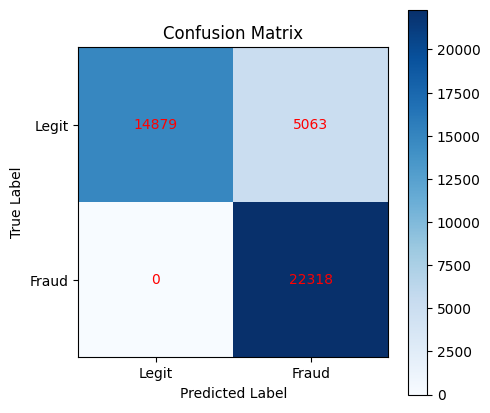

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 2️⃣ Confusion Matrix
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(5, 5))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ["Legit", "Fraud"])
plt.yticks([0, 1], ["Legit", "Fraud"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.colorbar()
plt.show()

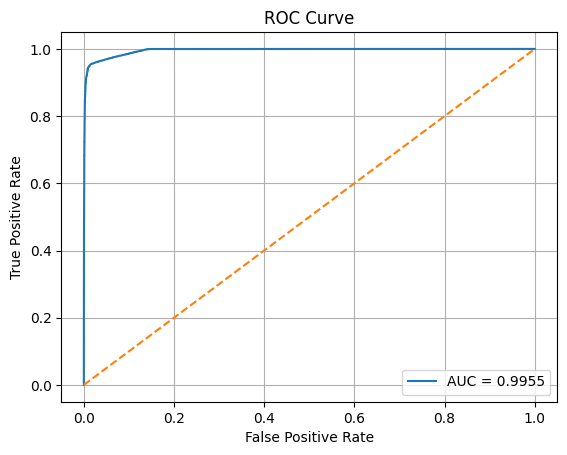

In [45]:

# 3️⃣ ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(labels, probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(labels, probs):.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

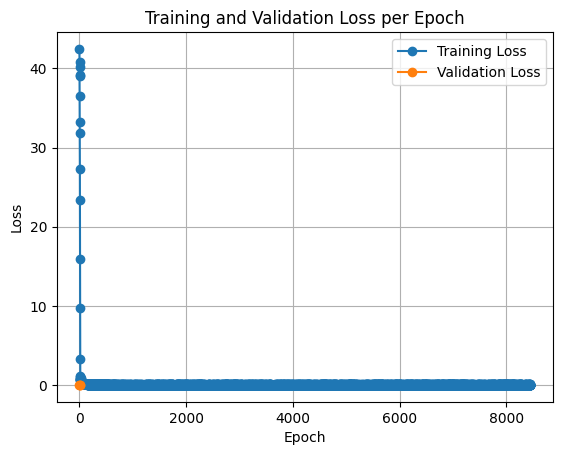

In [46]:
# Extract training and validation losses correctly
train_losses = [log['loss'] for log in trainer.state.log_history if 'loss' in log and 'epoch' in log]
eval_losses = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log and 'epoch' in log]

# Generate separate x-axis for each based on their actual lengths
train_epochs = list(range(1, len(train_losses) + 1))
eval_epochs = list(range(1, len(eval_losses) + 1))

# Plot losses
plt.figure()
plt.plot(train_epochs, train_losses, label="Training Loss", marker='o')
plt.plot(eval_epochs, eval_losses, label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss per Epoch")
plt.legend()
plt.grid()
plt.show()